Clasificación CIFAR-10 con MLP
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

Objetivo
El objetivo de esta práctica es entrenar una red neuronal multicapa (MLP, por sus siglas en
inglés) para clasificar imágenes del conjunto de datos CIFAR-10, optimizando su
arquitectura y parámetros para obtener el mejor rendimiento posible. CIFAR-10 contiene
60,000 imágenes a color divididas en 10 clases diferentes (como aviones, automóviles,
pájaros, etc.), cada imagen tiene una resolución de 32x32 píxeles.
Secciones de la Práctica
Parte 1: Introducción al conjunto de datos CIFAR-10
1. Cargar CIFAR-10: Comienza cargando y explorando el conjunto de datos. Visualiza
algunas imágenes junto con sus etiquetas para familiarizarte con los datos.
2. Preprocesamiento de datos: Las imágenes deben ser normalizadas para mejorar
el rendimiento del modelo. Normaliza los valores de los píxeles en el rango [0, 1].

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.layers import LeakyReLU, Activation


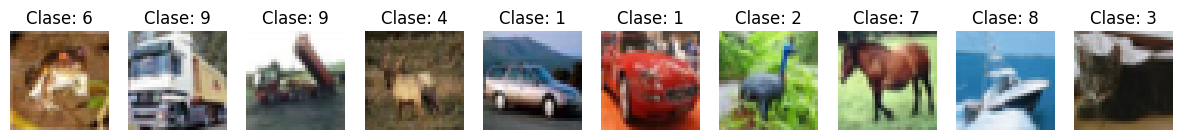

In [9]:
#Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalizar los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Visualizamos algunas imágenes del conjunto de datos
fig, axes = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f'Clase: {y_train[i][0]}')
    axes[i].axis('off')
plt.show()

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


Parte 2: Construcción del MLP
1. Estructura del MLP: Implementa un MLP con al menos 1 o 2 capas ocultas. La
entrada del MLP será el vector aplanado de las imágenes, es decir, tendrás una
capa densa que reciba vectores de 32x32x3 = 3072 características. Las capas
ocultas deben incluir funciones de activación no lineales como ReLU.
2. Función de salida: Utiliza una capa de salida con 10 neuronas (una para cada
clase) con activación softmax para producir probabilidades de clase.
3. Función de pérdida: Usa la función de pérdida categórica cruzada
(categorical_crossentropy).
4. Optimizador: Comienza con un optimizador como Adam o SGD con tasa de
aprendizaje ajustable.

In [10]:
# Modelo inicial con dos capas ocultas
model_initial = Sequential()
model_initial.add(Flatten(input_shape=(32, 32, 3)))  # Aplanar la imagen
model_initial.add(Dense(512, activation='relu'))  # Primera capa oculta
model_initial.add(Dense(256, activation='relu'))  # Segunda capa oculta
model_initial.add(Dense(10, activation='softmax'))  # Capa de salida

#Compilamos el modelo inicial
model_initial.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Parte 3: Entrenamiento del MLP
1. Entrenamiento del modelo: Entrena el modelo utilizando el conjunto de
entrenamiento de CIFAR-10 y ajusta parámetros como el número de épocas,
tamaño de lote (batch size), y tasa de aprendizaje.
2. Evaluación del modelo: Evalúa el rendimiento en el conjunto de prueba de CIFAR-
10, y mide la precisión del modelo.

In [11]:
history_initial = model_initial.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_data=(x_test, y_test_cat))


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2817 - loss: 2.0090 - val_accuracy: 0.3605 - val_loss: 1.7781
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3884 - loss: 1.6988 - val_accuracy: 0.4215 - val_loss: 1.6241
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4287 - loss: 1.5959 - val_accuracy: 0.4505 - val_loss: 1.5463
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4514 - loss: 1.5413 - val_accuracy: 0.4527 - val_loss: 1.5274
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4681 - loss: 1.4901 - val_accuracy: 0.4706 - val_loss: 1.4848
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4756 - loss: 1.4603 - val_accuracy: 0.4827 - val_loss: 1.4558
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4931 - loss: 1.4292 - val_accuracy: 0.4423 - val_loss: 1.5771
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5030 - loss: 1.3959 - 

Parte 4: Mejoras y Optimización
1. Mejorando la arquitectura:
- Agrega más capas ocultas o neuronas por capa para mejorar la capacidad
del modelo.
- Prueba distintas funciones de activación como LeakyReLU, Sigmoide o tanh .
- Considera agregar técnicas de regularización como Dropout para evitar el
sobreajuste.
2. Ajuste de hiperparámetros:
- Realiza pruebas variando la tasa de aprendizaje, número de épocas y el
tamaño de lote.
- Busca e Implementa estrategias como la de reducción de la tasa de
aprendizaje cuando el modelo no mejore en varias épocas.
3. Evaluación final: Mide la precisión del modelo mejorado y compara con la versión
inicial.
4. Regularización:
- Implementa Dropout para reducir el sobreajuste con una tasa de 0.2 en las
capas ocultas.
- Agrega Batch Normalization después de las capas ocultas.
5. Pruebas de hiperparámetros:
- Ajusta la tasa de aprendizaje e implementa una reducción progresiva si el
modelo se estanca.
- Incrementa el número de épocas si el modelo sigue mejorando.

In [12]:
# Modelo mejorado con más capas
model_improved = Sequential()

#Aplanar la imagen
model_improved.add(Flatten(input_shape=(32, 32, 3)))

# Primera capa oculta
model_improved.add(Dense(1024, activation='relu'))  # Activación ReLU
model_improved.add(BatchNormalization())  # Normalización por lotes
model_improved.add(Dropout(0.1))  # Dropout para regularización

# Segunda capa oculta
model_improved.add(Dense(512, activation='relu'))  # Activación sigmoid
model_improved.add(BatchNormalization())
model_improved.add(Dropout(0.1))

# Tercera capa oculta
model_improved.add(Dense(256, activation='relu'))  # Activación ReLU
model_improved.add(BatchNormalization())
model_improved.add(Dropout(0.1))

# Cuarta capa oculta
model_improved.add(Dense(128, activation='relu'))  # Activación ReLU
model_improved.add(BatchNormalization())
model_improved.add(Dropout(0.1))

# Cuarta capa oculta
model_improved.add(Dense(64, activation='relu'))  # Activación ReLU
model_improved.add(BatchNormalization())
model_improved.add(Dropout(0.1))

# Capa de salida
model_improved.add(Dense(10, activation='softmax'))  # Capa de salida con softmax

# Compilamos el modelo
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo mejorado
history_improved = model_improved.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_data=(x_test, y_test_cat))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.2904 - loss: 2.0327 - val_accuracy: 0.3501 - val_loss: 1.7992
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.4067 - loss: 1.6561 - val_accuracy: 0.3632 - val_loss: 1.7513
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.4318 - loss: 1.5850 - val_accuracy: 0.4157 - val_loss: 1.5888
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4591 - loss: 1.5108 - val_accuracy: 0.4566 - val_loss: 1.5197
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4737 - loss: 1.4844 - val_accuracy: 0.4455 - val_loss: 1.5682
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4887 - loss: 1.4464 - val_accuracy: 0.4261 - val_loss: 1.5989
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5004 - loss: 1.4046 - val_accuracy: 0.4478 - val_loss: 1.5884
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5121 - loss: 1.3744 - 

Parte 5: Informe de Resultados
Al final de la práctica, debes:
1. Documentar el rendimiento del modelo en diferentes configuraciones.
2. Presentar gráficos de la pérdida y la precisión a lo largo de las épocas.
3. Conclusiones: Explica qué cambios arquitectónicos o de parámetros fueron más
efectivos para mejorar el rendimiento.

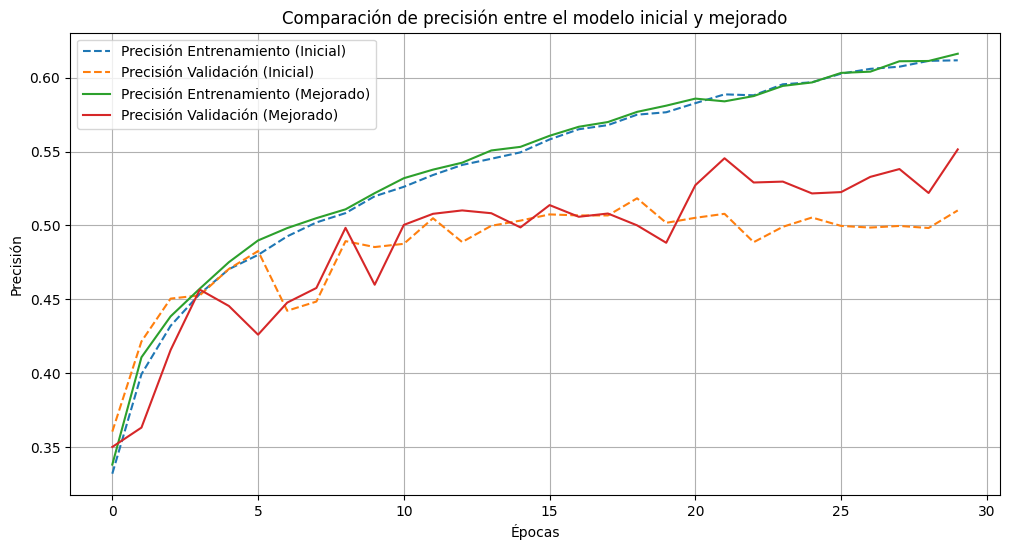

In [13]:
# Graficamos la precisión de ambos modelos
plt.figure(figsize=(12, 6))

#Precisión del entrenamiento y validación del modelo inicial
plt.plot(history_initial.history['accuracy'], label='Precisión Entrenamiento (Inicial)', linestyle='--')
plt.plot(history_initial.history['val_accuracy'], label='Precisión Validación (Inicial)', linestyle='--')

#Precisión del entrenamiento y validación del modelo mejorado
plt.plot(history_improved.history['accuracy'], label='Precisión Entrenamiento (Mejorado)', linestyle='-')
plt.plot(history_improved.history['val_accuracy'], label='Precisión Validación (Mejorado)', linestyle='-')

plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Comparación de precisión entre el modelo inicial y mejorado')
plt.grid(True)
plt.show()


Para el modelo mejorado probe utilizar una mayor cantidad de neuronas, y funciones de activacion tanh, tambien con dropouts altos de 0.3,0.4, sin embargo, la caida en la precision fue muy alta, bajo hasta 0.35/0.45. Por lo cual deje de usar la funcion tanh y baje el nivel del dropout a 0.1. 
Podemos observar a traves del gráfico de precisión (accuracy) que ambos modelos tuvieron resultados muy similares en términos de rendimiento global. Sin embargo,durante el entrenamiento, se observó que la precisión del modelo mejorado fue ligeramente más consistente a lo largo de las épocas. Aunque las mejoras arquitectónicas no resultaron en un aumento drástico del rendimiento, sí lograron estabilizar el aprendizaje del modelo, mostrando una convergencia más uniforme.